## Exercie 8.1 Capteur de force

Développements sur la base de cet exercice autour du pont de Wheatstone

In [4]:
# Import usuels
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

# Fonction utilisée pour afficher la valeur d'une expression sous la forme "nom = valeur"
def deq(name, value):
    return sp.Eq(sp.Symbol(name),value)

### Equations du pont de wheatstone

Equations de base pour le pont ci-dessous

    --------------------
    |   |              |
    |   R1             R3
    U0  |----- Um -----|
    |   |              |
    |   R2             R4
    |   |              |
    --------------------

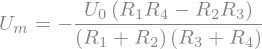

In [5]:

# Valeurs symboliques
U0,R1,R2,R3,R4 = sp.symbols("U0,R1,R2,R3,R4")

# Equations du pont
Ug=U0*(R2/(R1+R2))
Ud=U0*(R4/(R3+R4))

Um=Ug-Ud
deq("U_m",sp.factor(Um))

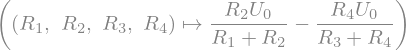

In [6]:
# Definition d'une fonction
fUm=sp.Lambda((R1,R2,R3,R4),Um)
fUm

### Jauges placée parallèlement

Si on branche deux Jauges qui varient de la même façon, on doit les placer sur R1 et R4 (ou R2 et R3).

On définit les valeurs des jauges de cette façon :

$$
R = R0 + \Delta R_T + \Delta R_F
$$
Avec $R0$ la valeur nominale, $\Delta R_T$ l'influence de la température et $\Delta R_F$ l'influence de la force, soit la valeur qui nous intéresse.

On substitue dans l'expression de UA les valeurs comme suit :

In [7]:
R0 =sp.symbols("R0")
DRT = sp.Symbol("\Delta R_T")
DRT2 = sp.Symbol("\Delta R_T2")
DRF = sp.Symbol("\Delta R_F")
R1=R0+DRT+DRF
R4=R0+DRT+DRF
R2=R0+DRT2
R3=R0+DRT2

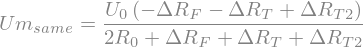

In [8]:
Um_same=fUm(R1,R2,R3,R4).simplify()
deq("Um_same",Um_same)

On voit que si $\Delta R_T=\Delta R_T2$, le numérateur se simplifie :

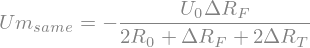

In [9]:
# On substitue à DRT2 la valeur de DRT
deq("Um_same",Um_same.subs(DRT2,DRT))

Application numérique

In [1]:
vR0=350
vE=21000*10*1e6
vK=2
vNu=0.3
vU0=10
vS=20e-4
vF=10e3

vDRTmax=50*10.8*vR0*1e-6 # selon datasheet de la jauge : 10.8ppm/K, pour 50°C
vDRFmax=vK*vR0/vE*vF/vS


In [2]:
# Valeurs numériques obtenues pour les variations
[vDRTmax, vDRFmax]

[0.189, 0.016666666666666666]

**NOTE** La variation de température est 10x plus élevée que la variation due à la force.

On trace ci-dessous la variation de la tension $Um$ selon une variation de $\Delta R_F$. Les différentes traces correspondent à différentes températures.

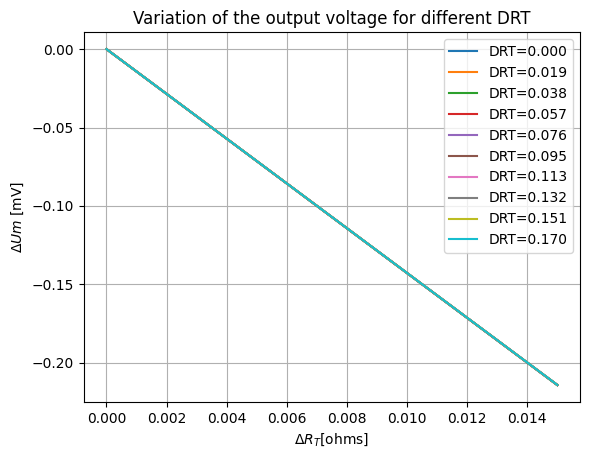

In [12]:
# vDRTmax = vDRTmax*1000

rDRF=np.arange(0,vDRFmax,vDRFmax/10)
rDRT=np.arange(0,vDRTmax,vDRTmax/10) 
# La variation de DRT2 
#rDRT2=np.zeros(len(rDRT))    # pas de variation
rDRT2=np.arange(0,vDRTmax,vDRTmax/10) # même variation de les Jauges

Mf=len(rDRF)
Mt=len(rDRT)
vUm=np.zeros((Mt,Mf))
for i in range(Mt):
    for j in range(Mf):
        valeurs={U0:vU0,R0:vR0,DRF:rDRF[j], DRT:rDRT[i], DRT2:rDRT2[i]}
        vUm[i,j]=Um_same.subs(valeurs).evalf()
    plt.plot(rDRF, vUm[i]*1000, label='DRT={:.3f}'.format(rDRT[i]))
plt.grid()
plt.ylabel("$\Delta Um$ [mV]")
plt.xlabel("$\Delta R_T$[ohms]")
plt.title("Variation of the output voltage")
plt.legend()
plt.show()

On peut constater que l'influence de la température est très faible.

### Une jauge placée perpendiculairement

Si une des Jauges est placée perpendiculairement sur la barre, sa résistance diminue d'un facteur $\nu$. On place alors les 2 jauges dans une branche du pont

In [19]:
nu=sp.symbols("nu")
R1=R0+DRT+DRF
R2=R0+DRT-nu*DRF
R3=R0
R4=R0

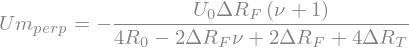

In [20]:
Um_perp=fUm(R1,R2,R3,R4).simplify()
deq("Um_perp",Um_perp)

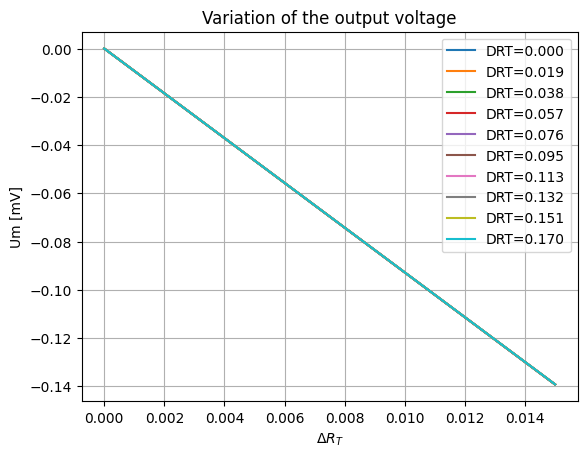

In [21]:

Mf=len(rDRF)
Mt=len(rDRT)
vUm=np.zeros((Mt,Mf))
for i in range(Mt):
    for j in range(Mf):
        valeurs={U0:vU0,R0:vR0,nu:vNu,DRF:rDRF[j], DRT:rDRT[i]}
        vUm[i,j]=Um_perp.subs(valeurs).evalf()
    plt.plot(rDRF, vUm[i]*1000, label='DRT={:.3f}'.format(rDRT[i]))
plt.grid()
plt.ylabel("Um [mV]")
plt.xlabel("$\Delta R_T$")
plt.title("Variation of the output voltage")
plt.legend()
plt.show()

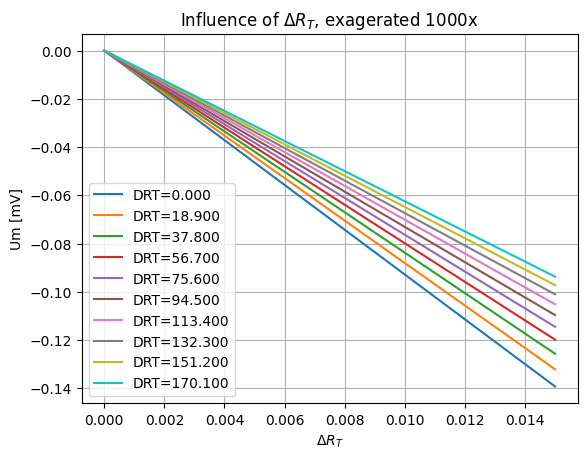

In [25]:
rDRTex = rDRT * 1000
Mf=len(rDRF)
Mt=len(rDRTex)
vUm=np.zeros((Mt,Mf))
for i in range(Mt):
    for j in range(Mf):
        valeurs={U0:vU0,R0:vR0,nu:vNu,DRF:rDRF[j], DRT:rDRTex[i]}
        vUm[i,j]=Um_perp.subs(valeurs).evalf()
    plt.plot(rDRF, vUm[i]*1000, label='DRT={:.3f}'.format(rDRTex[i]))
plt.grid()
plt.ylabel("Um [mV]")
plt.xlabel("$\Delta R_T$")
plt.title("Influence of $\Delta R_T$, exaggerated 1000 times")
plt.legend()
plt.show()

### Pont complet

Si on utilise un pont complet composé de résistances dont la valeur nominale est $R0$, chacune est influencée de la même façon par la température de $\Delta R_T$, et chacune varie de  $\Delta R_F$ selon son branchement dans le pont :

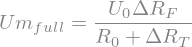

In [28]:
R1= R0-DRF+DRT
R2= R0+DRF+DRT
R3= R0+DRF+DRT
R4= R0-DRF+DRT
Um_full=fUm(R1,R2,R3,R4).simplify()
deq("Um_full",Um_full)

Cette expression montre que la tension est proportionnelle au rapport de la variation de résistance à la résistance. La valeur est donc moins sensible à la température.

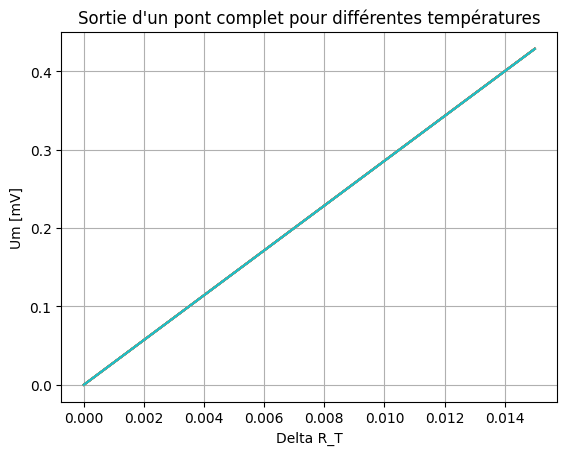

In [29]:
vUm=np.zeros((Mt,Mf))
for i in range(Mt):
    for j in range(Mf):
        valeurs={U0:vU0,R0:vR0,nu:vNu,DRF:rDRF[j], DRT:rDRT[i]}
        vUm[i,j]=Um_full.subs(valeurs).evalf()
    plt.plot(rDRF, vUm[i]*1000)
plt.grid()
plt.ylabel("Um [mV]")
plt.xlabel("Delta R_T")
plt.title("Sortie d'un pont complet pour différentes températures")
plt.show()

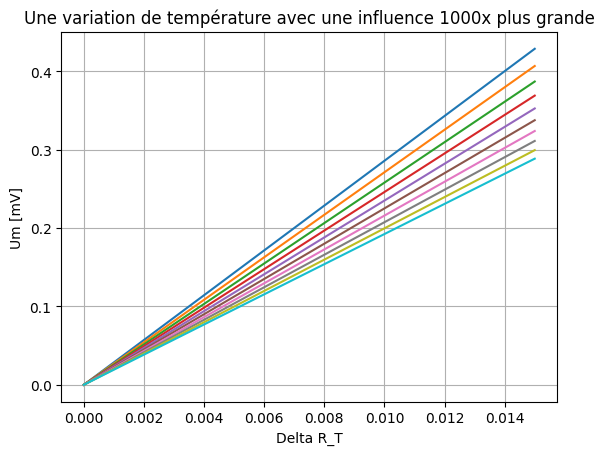

In [31]:
# On force sur la variation due à la température
vUm=np.zeros((Mt,Mf))
for i in range(Mt):
    for j in range(Mf):
        valeurs={U0:vU0,R0:vR0,nu:vNu,DRF:rDRF[j], DRT:rDRTex[i]}
        vUm[i,j]=Um_full.subs(valeurs).evalf()
    plt.plot(rDRF, vUm[i]*1000)
plt.grid()
plt.ylabel("Um [mV]")
plt.xlabel("Delta R_T")
plt.title("Une variation de température avec une influence 1000x plus grande")
plt.show()